In [1]:
import gym
import sys

sys.path.append("/Users/amir/code/rlsepsis234/gym-sepsis")
from baselines import deepq
from baselines import bench
from baselines import logger
from baselines.common.atari_wrappers import make_atari
from baselines.common import models
import gym_sepsis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
logger.configure("dqn-log")
env = gym.make("sepsis-vae-v0")
model = deepq.learn(
    env=env,
    prioritized_replay=True,
    checkpoint_path="dqn-ckpt{}".format(time.time()),
    seed=1,
    total_timesteps=2000,
    network=models.mlp(num_hidden=128, num_layers=2),
)

model.save('dqn-vae.model')
env.close()

Logging to dqn-log
Instructions for updating:
Colocations handled automatically by placer.
Tensor("z/random_normal:0", shape=(?, 30), dtype=float32)
Tensor("z_1/random_normal:0", shape=(?, 30), dtype=float32)
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use keras.layers.flatten instead.


/Users/amir/code/rlsepsis234/.env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/amir/code/rlsepsis234/.env/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -14.4    |
| steps                   | 271      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -14.1    |
| steps                   | 527      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | -14.1    |
| steps                   | 784      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 400      |
| mean 100 episode reward | -14.1    |
| steps                   | 1081     |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [4]:
test_data = pd.read_csv("/Users/amir/Downloads/test_state_action_reward_df.csv")

In [14]:
rewards = []
steps = []
actions = []

for i in range(2000):
    if i%100 == 0 and i>0:
        print("Done with %d steps..." % i)
    obs, done = env.reset(), False
    episode_rew = 0
    total_steps = 0
    while not done:
        action = model(obs[None])[0]
        actions.append(action)
        obs, rew, done, _ = env.step(action)
        episode_rew += rew
        total_steps += 1
    rewards.append(episode_rew)
    steps.append(total_steps)

Done with 100 steps...


KeyboardInterrupt: 

In [6]:
steps = np.array(steps) 

Text(0.5, 1.0, 'Learned Policy Episode Length (DQN)')

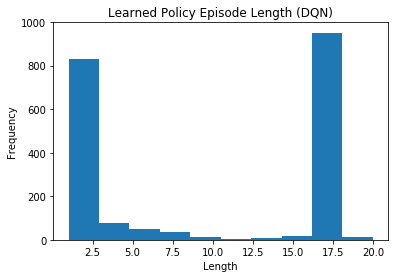

In [7]:
plt.hist(steps)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Length (DQN)")

Text(0.5, 1.0, "Physician's Policy Episode Length")

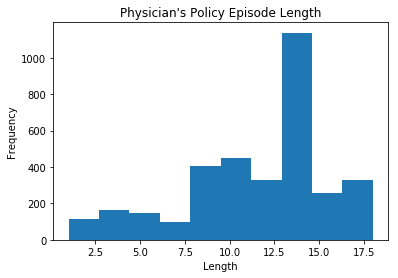

In [8]:

plt.hist(test_data.groupby(['subject_id','hadm_id',  'icustay_id']).count()["BUN"].values)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Physician's Policy Episode Length")

Text(0.5, 1.0, "Physician's Policy Episode Rewards")

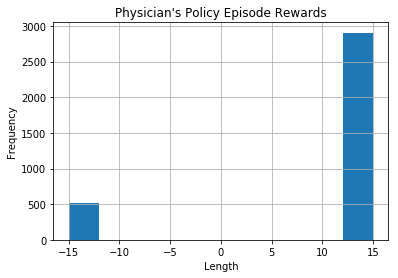

In [9]:
test_data.groupby(['subject_id','hadm_id',  'icustay_id']).sum()["reward"].hist()
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Physician's Policy Episode Rewards")

Text(0.5, 1.0, 'Learned Policy Episode Rewards (DQN)')

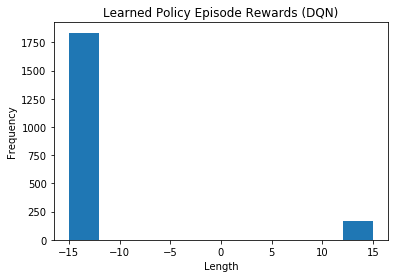

In [10]:
plt.hist(rewards)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Rewards (DQN)")

Text(0.5, 1.0, "Learned Policy's Actions (DQN)")

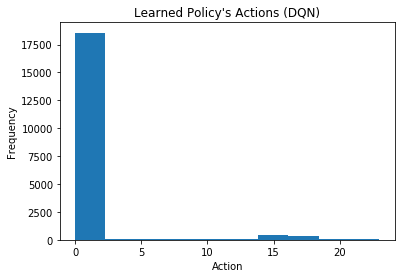

In [11]:
plt.hist(actions)
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Learned Policy's Actions (DQN)")

Text(0.5, 1.0, "Physician Policy's Actions")

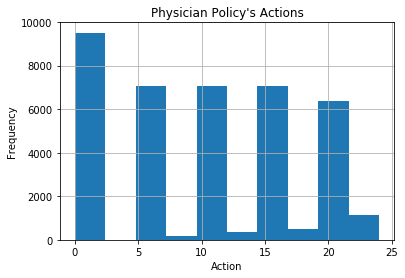

In [12]:
test_data["discrete_action"].hist()
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Physician Policy's Actions")

In [13]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE', 
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']

